<a href="https://colab.research.google.com/github/rares985/machine-learning/blob/master/univariate_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Univariate linear regression

This document showcases the application of gradient descent on univariate linear regression.

First off, let's generate some random points in 2D.
The points will be stored in an $ m \times 1 $ matrix, where $ m $ represents the number of training samples or, in our case, the number of generated points.
Visually, $ X $ looks like this:

$$ 
X = 
\begin{bmatrix}
    x_0 \\
    x_1 \\
    x_2 \\
    \vdots \\
    x_m
\end{bmatrix}
$$

We are also adding a column of ones as the first column in the matrix, also known as the *intercept* term. Therefore, $ X $ will look like:

$$
X = 
\begin{bmatrix}
    1 & x_0 \\
    1 & x_1 \\
    1 & x_2 \\
    \vdots & \vdots \\
    1 & x_m
\end{bmatrix}
$$

In [306]:
import numpy as np

low = 0
high = 100
how_many = 25

a = 3
b = 4
noise_lo = 0
noise_hi = 60

X = np.random.uniform(low, high, how_many).reshape(-1, 1)

noise = np.random.uniform(noise_lo, noise_hi, how_many).reshape(-1, 1)
y = a * X + b + noise # This is to better see how the line is fitted so it does not overlap with the points

X_intercept = np.hstack((np.ones_like(X), X))

print(X_intercept.shape)


m = X.shape[0] # Number of training samples

(25, 2)


Now let's initialize our regressor. $ \theta $ will be a matrix of two elements of size $ 2 \times 1 $, like this:

$$
\theta = 
\begin{bmatrix}
    \theta_0 \\
    \theta_1 
\end{bmatrix}
$$


In [326]:
import tqdm

theta = np.array([0.5, 0.5]).reshape(-1, 1)

J_hist = []

# Hyper parameters
epochs = 100
learning_rate = 1e-4

for n_ep in tqdm.tqdm(range(epochs)):
    
    # Compute outputs

    y_hat = X_intercept @ theta

    # Compute additional helper value - delta
    delta = y_hat - y

    # Cost function
    J = (delta.T @ delta) / (2 * m)

    J_hist.append(J)

    # Derivative
    djdw = (1 / m) * (X_intercept.T @ delta)

    # Update weights
    theta -= learning_rate * djdw

print('\n')
print('Final theta is: {} {}'.format(theta[0], theta[1]))
print('Real theta is: {} {}'.format(b, a))


100%|██████████| 100/100 [00:00<00:00, 41750.99it/s]



Final theta is: [0.61096473] [3.62346657]
Real theta is: 4 3


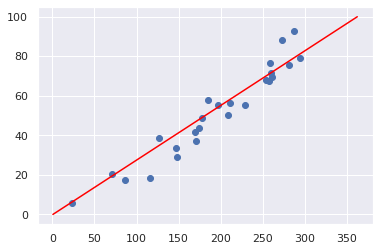

In [325]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

fig, ax = plt.subplots()

# Plot the points first
ax.scatter(y, X)

xs = np.arange(low, high, 0.1).reshape(-1, 1)
xs = np.hstack((np.ones_like(xs), xs))

ys = xs @ theta

ax.plot(ys, xs[:, 1], color='red')

plt.show()





